In [13]:
import numpy as np
import os
import matplotlib.pyplot as plt
errors_alpha1_3299 = np.load('errors_alpha1_3299.npy', allow_pickle=True)
times_alpha1_3299 = np.load('times_alpha1_3299.npy', allow_pickle=True)
errors_alpha1_3400 = np.load('errors_alpha1_3400.npy', allow_pickle=True)
times_alpha1_3400 = np.load('times_alpha1_3400.npy', allow_pickle=True)

In [14]:
print(errors_alpha1_3299.shape)
print(errors_alpha1_3400.shape)

(148,)
(201,)


In [22]:
errors = list(errors_alpha1_3299) + list(errors_alpha1_3400)
times = list(times_alpha1_3299) + list(times_alpha1_3400)
print(len(errors))

349


517
0.8491295938104448


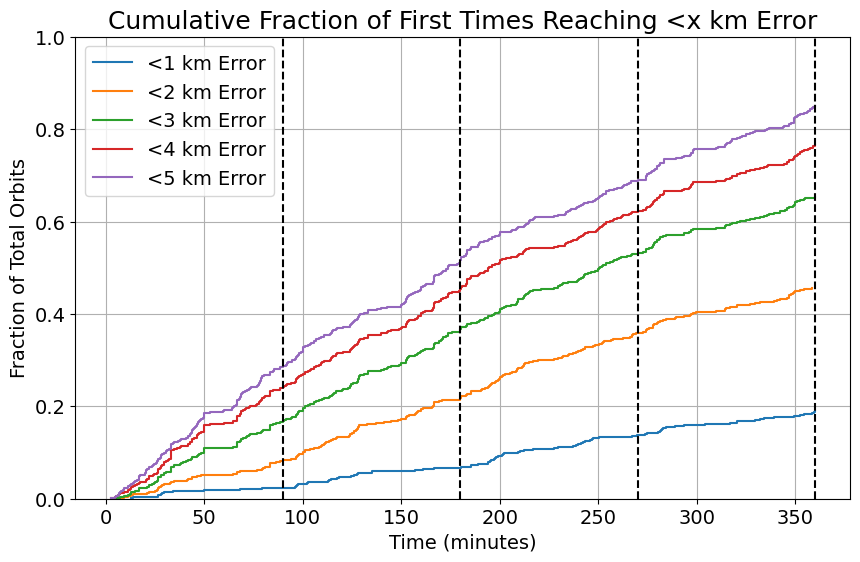

In [59]:
def time_to_error_hist():
    # folder = "landmarks/camera_ready/dets_and_poses_thres_fixed"
    folder = "landmarks/camera_ready/dets_and_poses_4orbits"
    folder = '.'
    # folder = "landmarks/camera_ready/orbits"
    # list all np arrays in the folder
    files = os.listdir(folder)
    # filter for npy files
    files = [f for f in files if f.endswith('.npy')]
    # sort the files
    files.sort()
    errors = []
    times = []
    for f in files:
        if 'errors' in f:
            errors+=list(np.load(folder + '/' + f, allow_pickle=True))
            times+=list(np.load(folder + '/' + f.replace('errors', 'times'), allow_pickle=True))
    # ipdb.set_trace()
    # errors = np.concatenate(errors)
    # times = np.concatenate(times)
    # errors = np.load(folder + '/errors.npy', allow_pickle=True)
    # times = np.load(folder + '/times.npy', allow_pickle=True)
    num_trajs = len(errors)
    print(num_trajs)
    time_for_10 = []
    time_for_5 = []
    time_for_2 = []
    time_for_1 = []

    for i in range(num_trajs):
        filtered_errors_10 = errors[i] < 10
        filtered_errors_5 = errors[i] < 5
        filtered_errors_2 = errors[i] < 2
        filtered_errors_1 = errors[i] < 1
        if np.any(filtered_errors_10):
            time_for_5.append(times[i][np.argmax(errors[i]<10)])
        else:
            pass
        if np.any(filtered_errors_5):
            time_for_5.append(times[i][np.argmax(errors[i]<5)])
        else:
            pass
        if np.any(filtered_errors_2):
            time_for_2.append(times[i][np.argmax(errors[i]<2)])
        else:
            pass
        if np.any(filtered_errors_1):
            time_for_1.append(times[i][np.argmax(errors[i]<1)])
        else:
            pass
            
    # ipdb.set_trace()
    time_for_10 = np.array(time_for_10)
    time_for_5 = np.array(time_for_5)
    time_for_2 = np.array(time_for_2)
    time_for_1 = np.array(time_for_1)
    # Sort the times for cumulative calculation
    time_for_10_sorted = np.sort(time_for_10)
    time_for_5_sorted = np.sort(time_for_5)
    time_for_2_sorted = np.sort(time_for_2)
    time_for_1_sorted = np.sort(time_for_1)
    maxerr = 5
    # Calculate the cumulative fraction of trajectories
    # Normalize by the total number of trajectories, not just those filtered
    timefor = []
    cumfracs = []
    for j in range(1, maxerr+1):
        timefor.append([])
        for i in range(num_trajs):           
            filtered_errors = errors[i] < j
            if np.any(filtered_errors):
                timefor[j-1].append(times[i][np.argmax(errors[i]<j)])
            else:
                pass
        timefor[j-1] = np.array(timefor[j-1])
        timefor[j-1] = np.sort(timefor[j-1])
    for i in range(0, maxerr):
        cumfrac = np.arange(1, len(timefor[i])+1) / num_trajs
        cumfracs.append(cumfrac)



    cumulative_fraction_10 = np.arange(1, len(time_for_10) + 1) / num_trajs
    cumulative_fraction_5 = np.arange(1, len(time_for_5) + 1) / num_trajs
    cumulative_fraction_2 = np.arange(1, len(time_for_2) + 1) / num_trajs
    cumulative_fraction_1 = np.arange(1, len(time_for_1) + 1) / num_trajs

    
    # Plotting the cumulative fraction
    plt.figure(figsize=(10, maxerr+1))

    for i in range(maxerr):
        curtime = timefor[i]/60
        plt.step(curtime, cumfracs[i], where='post', label='<' + str(i+1) + ' km Error')


    xcoords = [90, 180, 270, 360]
    for xc in xcoords:
        plt.axvline(x=xc, color='k', linestyle='--')

    plt.rc('font', size=14)
    plt.rc('axes', titlesize=18)
    #plt.tight_layout()
    # #plt.step(time_for_10_sorted, cumulative_fraction_10, where='post', label='Fraction of Orbits <10km Error')
    # plt.step(time_for_5_sorted, cumulative_fraction_5, where='post', label='Fraction of Orbits <5km Error')
    # plt.step(time_for_2_sorted, cumulative_fraction_2, where='post', label='Fraction of Orbits <2km Error')
    # plt.step(time_for_1_sorted, cumulative_fraction_1, where='post', label='Fraction of Orbits <1km Error')
    plt.title('Cumulative Fraction of First Times Reaching <x km Error')
    plt.xlabel('Time (minutes)')
    plt.ylabel('Fraction of Total Orbits')
    plt.ylim(0, 1)  # Ensure y-axis goes from 0 to 1 to represent the full range of fractions
    plt.grid(True)
    plt.legend()
    plt.savefig('time_to_x_orbits4.png')

    print(cumfracs[-1][-1])
    
if __name__ == '__main__':
    # time_to_error()
    time_to_error_hist()